# Was there a Sattelzeit?

In [1]:
from ipynb.fs.full.koselleck import *

## Novelty scores

In [64]:
def get_nov_data_summarised(foote_size=5):
    l=[]
    with get_db('nov','r') as db:
        for qstr,wdf in tqdm(db.items(), total=len(db)):
            wdf=wdf.reset_index().sort_values('period').query(f'foote_size=={foote_size}')
            wdf['period_int']=[int(p[:4]) for p in wdf['period']]
            wdf['is_signif']=wdf['p_peak']<0.05
            wdf_signif=wdf[wdf.is_signif==True]
            changepoint=wdf_signif.iloc[0].period_int if len(wdf_signif) else np.nan
            changepoint_avg=wdf_signif.period_int.median() if len(wdf_signif) else np.nan
            
            num_signif=len(wdf_signif)
            
            word,prdstr,atrstr=qstr.split('/')
            yminymax,ybin=prdstr.split('_')
            ybin=ybin.replace('by','')
            kstr=atrstr.split('k=')[-1]
            ymin,ymax=yminymax.split('-')
            dx1=dict(
                word=word,
                changepoint_first=changepoint,
                changepoint_avg=changepoint_avg,
                
                num_signif_periods=num_signif,
                num_periods=len(wdf),
                
                ymin=ymin,
                ymax=ymax,
                ybin=ybin,
                k=kstr
            )
            dx={
                **dict(wdf.mean()),
                **dict((k+'_signif',v) for k,v in wdf_signif.mean().items()),
                **dx1,
            }
            l+=[dx]
    odf=pd.DataFrame(l).sort_values('foote_novelty',ascending=False)
    odf=odf[~odf.foote_novelty.isna()]
    return odf.set_index('word')

In [65]:
dfnovdata = get_nov_data_summarised()
dfnovdata

100%|██████████| 15483/15483 [01:29<00:00, 172.54it/s]


,foote_novelty,foote_size,p_peak,p_trough,period_int,is_signif,word_signif,period_signif,foote_novelty_signif,foote_size_signif,...,is_signif_signif,changepoint_first,changepoint_avg,num_signif_periods,num_periods,ymin,ymax,ybin,k,period
word,,,,,,,,,,,,,,,,,,,,,
offertory,6.508264,5.0,0.010000,0.000000,1870.000000,1.000000,NaN,NaN,6.508264,5.0,...,1.0,1870.0,1870.0,1,1,1720,1900,5,10,NaN
manuals,5.591858,5.0,0.305000,0.800000,1862.500000,0.500000,NaN,NaN,6.372462,5.0,...,1.0,1865.0,1867.5,2,4,1720,1900,5,10,NaN
polonaise,5.424290,5.0,0.345000,0.590000,1867.500000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,2,1720,1900,5,10,NaN
satin,5.207287,5.0,0.744348,0.647826,1813.913043,0.086957,NaN,NaN,9.996319,5.0,...,1.0,1790.0,1802.5,2,23,1720,1900,5,10,NaN
handicap,4.796864,5.0,0.872500,0.595000,1862.500000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,4,1720,1900,5,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stand,0.277234,5.0,0.929615,0.745000,1807.500000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,26,1720,1900,5,10,NaN
truth,0.268999,5.0,0.974615,0.848077,1807.500000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,26,1720,1900,5,10,NaN
long,0.254179,5.0,0.861923,0.785000,1807.500000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,26,1720,1900,5,10,NaN


In [75]:
# dfnovdata.loc[set(dfnovdata.index) & set(get_keywords())]#.num_periods.value_counts()

In [80]:
dfnovdata[
    dfnovdata.num_periods==dfnovdata.num_periods.max()
].sort_values('foote_novelty',ascending=False).head(25)

,foote_novelty,foote_size,p_peak,p_trough,period_int,is_signif,word_signif,period_signif,foote_novelty_signif,foote_size_signif,...,is_signif_signif,changepoint_first,changepoint_avg,num_signif_periods,num_periods,ymin,ymax,ybin,k,period
word,,,,,,,,,,,,,,,,,,,,,
dealer,4.513228,5.0,0.860000,0.879231,1807.5,0.076923,NaN,NaN,8.437457,5.0,...,1.0,1790.0,1792.5,2,26,1720,1900,5,10,NaN
grocer,4.369832,5.0,0.863462,0.651154,1807.5,0.038462,NaN,NaN,8.169233,5.0,...,1.0,1795.0,1795.0,1,26,1720,1900,5,10,NaN
strand,4.213378,5.0,0.768846,0.799231,1807.5,0.192308,NaN,NaN,8.294575,5.0,...,1.0,1750.0,1815.0,5,26,1720,1900,5,10,NaN
wilts,4.078762,5.0,0.823846,0.838077,1807.5,0.115385,NaN,NaN,6.534449,5.0,...,1.0,1825.0,1865.0,3,26,1720,1900,5,10,NaN
cloth,3.893135,5.0,0.823077,0.752692,1807.5,0.115385,NaN,NaN,11.743591,5.0,...,1.0,1825.0,1830.0,3,26,1720,1900,5,10,NaN
builder,3.712662,5.0,0.748462,0.841154,1807.5,0.115385,NaN,NaN,6.618023,5.0,...,1.0,1830.0,1835.0,3,26,1720,1900,5,10,NaN
velvet,3.575940,5.0,0.798462,0.607308,1807.5,0.038462,NaN,NaN,6.869270,5.0,...,1.0,1790.0,1790.0,1,26,1720,1900,5,10,NaN
broker,3.432882,5.0,0.771154,0.604615,1807.5,0.153846,NaN,NaN,6.553871,5.0,...,1.0,1790.0,1797.5,4,26,1720,1900,5,10,NaN
foil,3.429834,5.0,0.812692,0.733846,1807.5,0.115385,NaN,NaN,11.210859,5.0,...,1.0,1810.0,1815.0,3,26,1720,1900,5,10,NaN


In [74]:
# dfnovdata.loc[['culture','labour','liberty','station']]#.num_periods.value_counts()

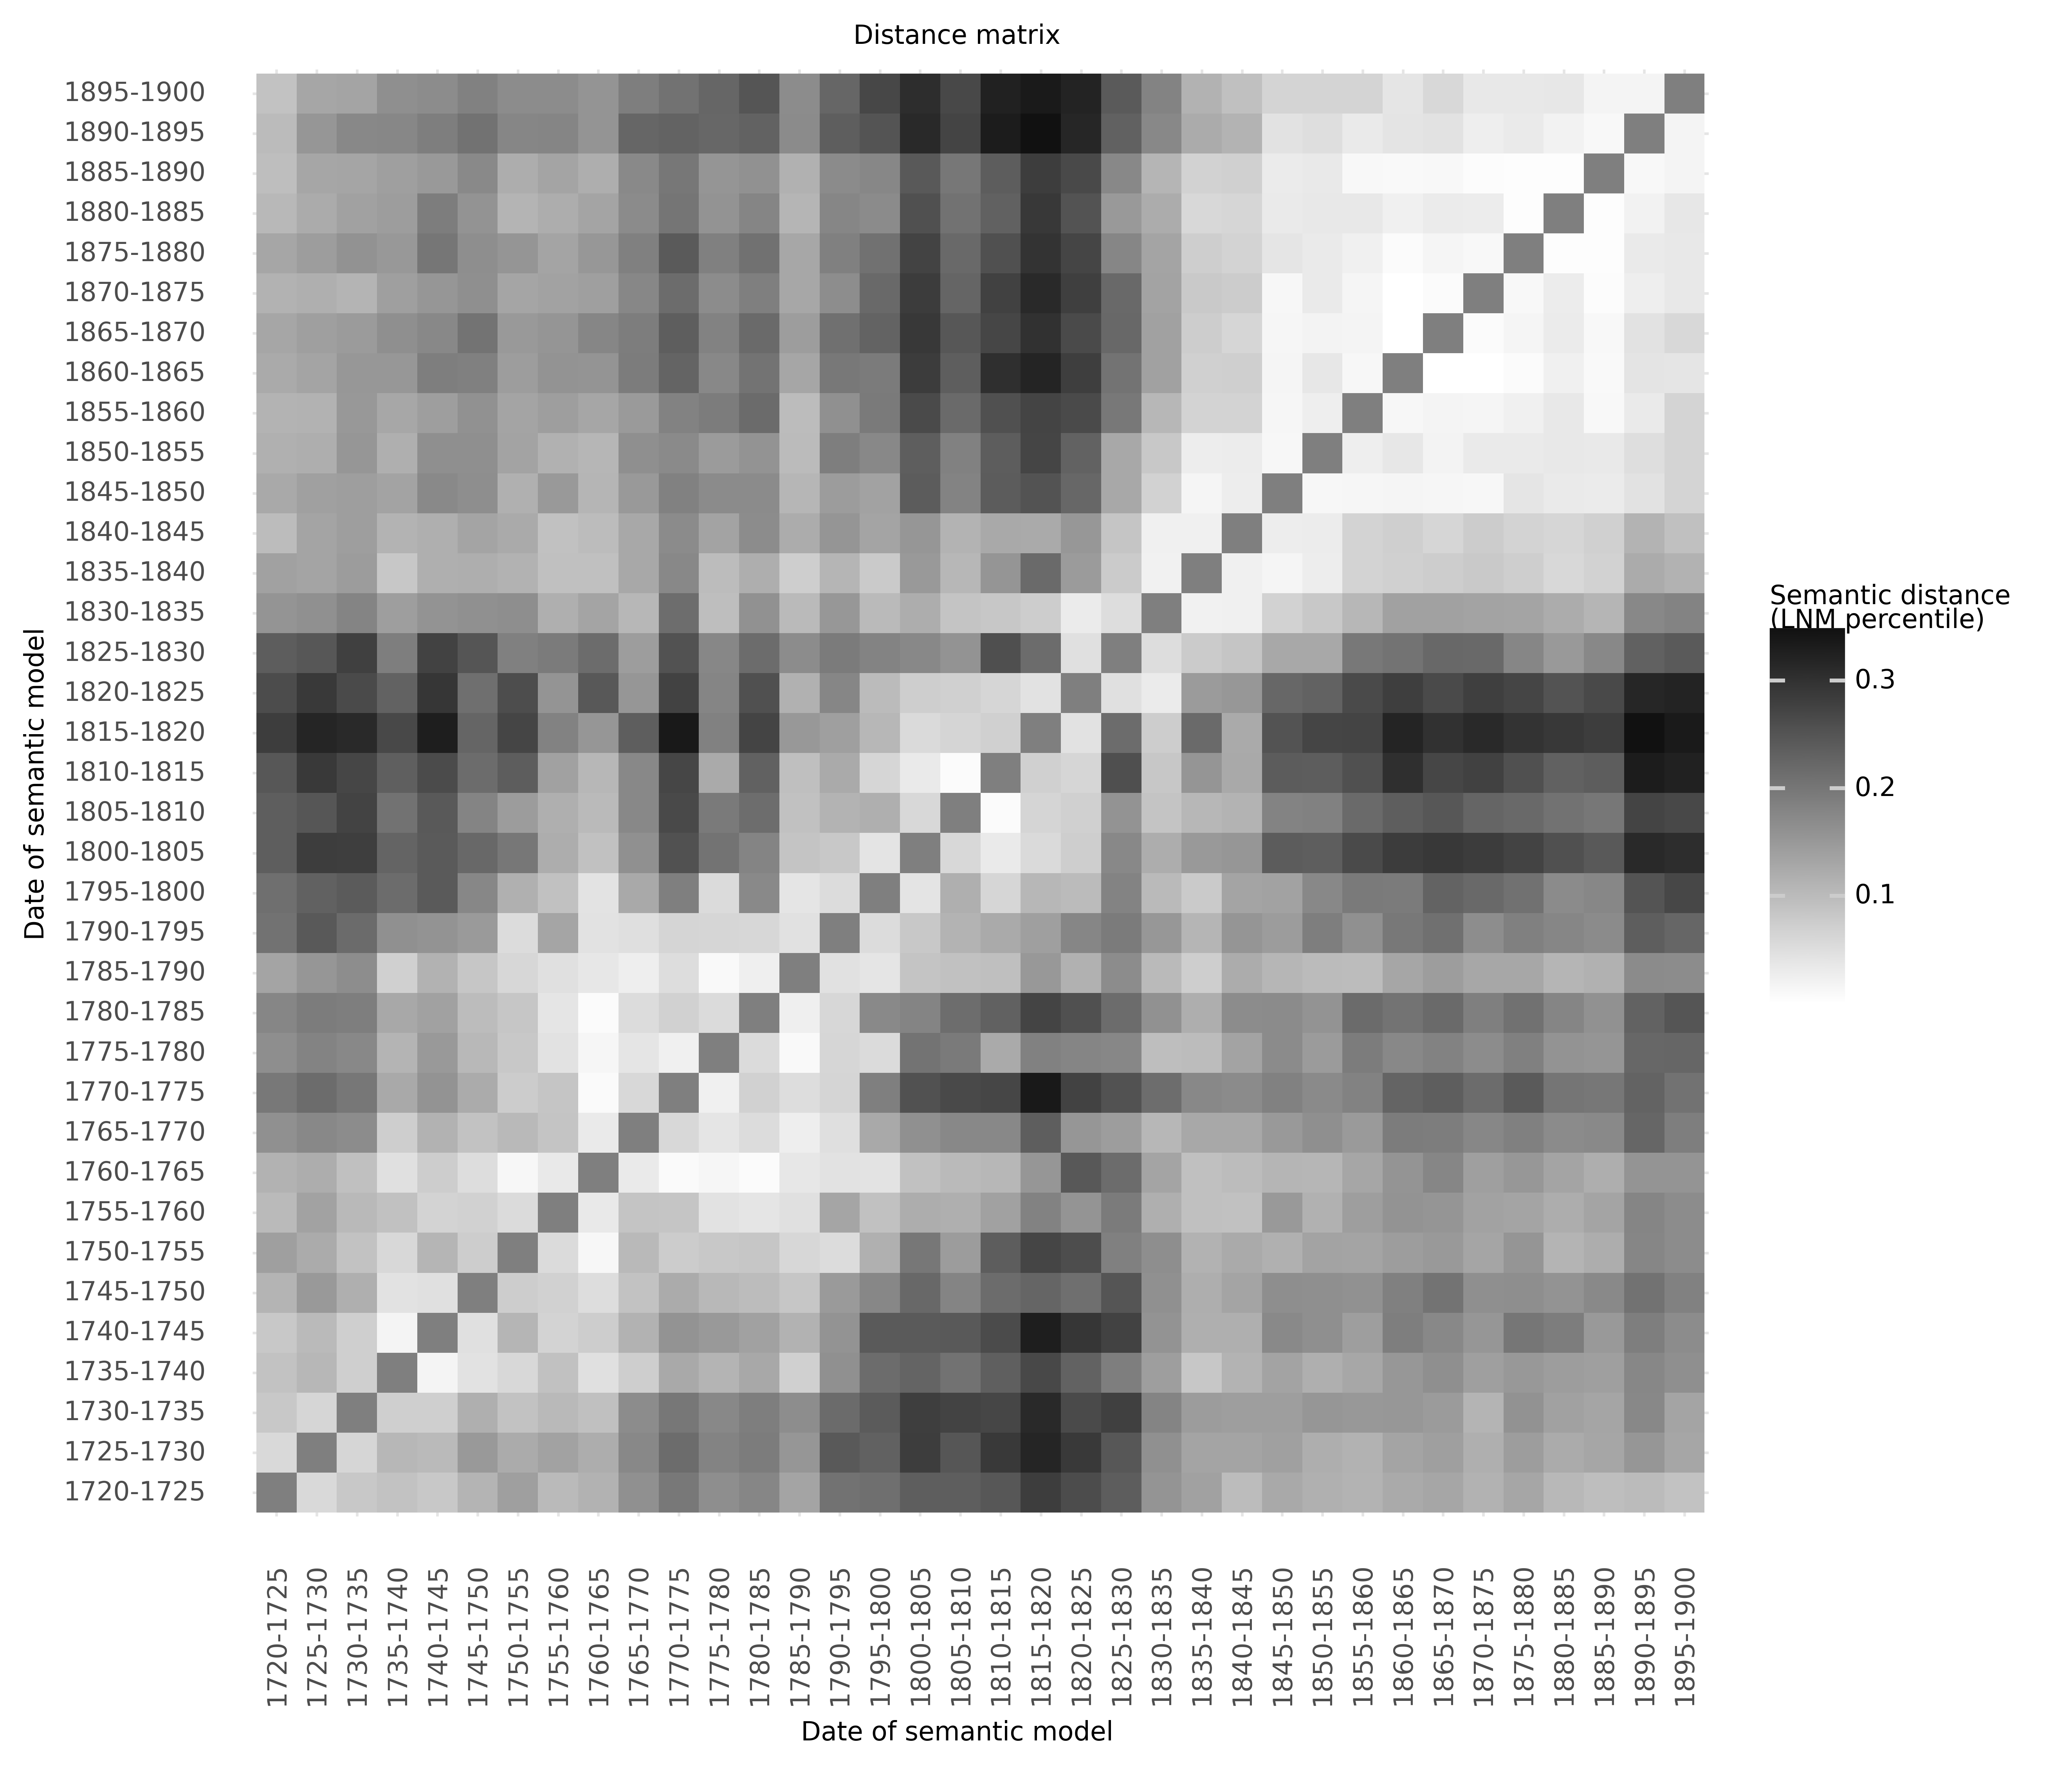

<ggplot: (8763604351236)>

In [89]:
plot_distmat(distmat('merchant'))

In [88]:
# for i,g in nbr('embroidered').groupby('period'):
#     print(i)
#     display(g.head(10))

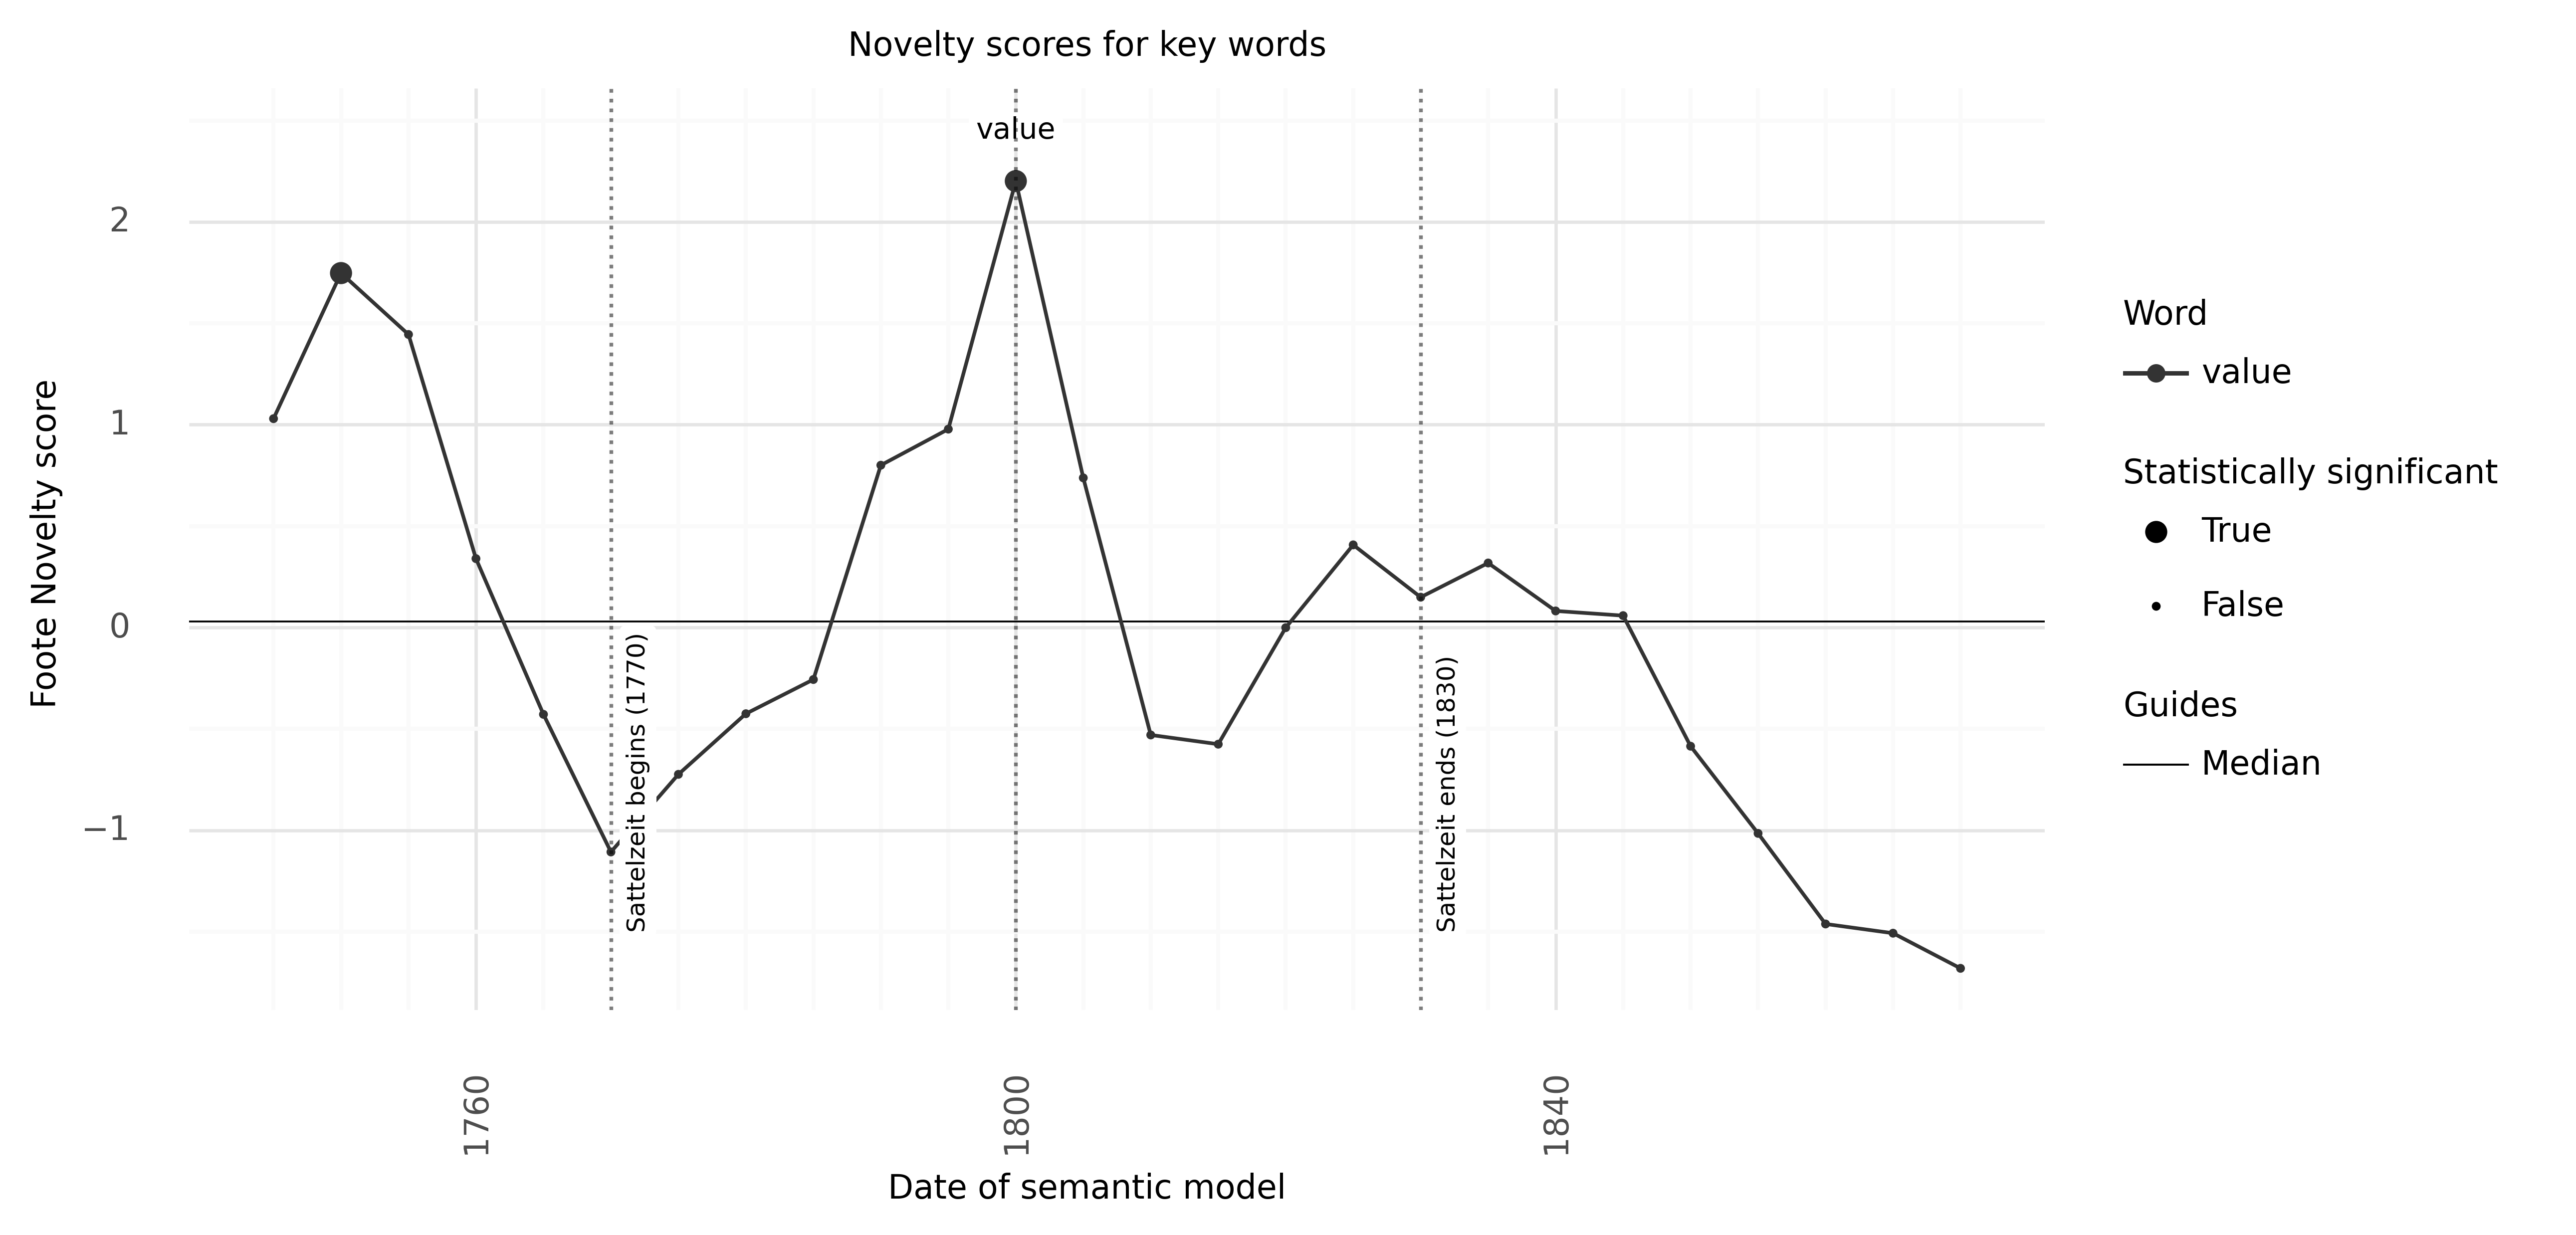

<ggplot: (8754536567303)>

In [4]:
plot_novelty_words('value')

In [5]:
nov('value')

[Koselleck] (18:34:51) nov(value) (+43.7s)


foote_novelty  foote_size  p_peak  p_trough
word  period                                                
value 1730-1735       0.223245           2    1.00      1.00
      1735-1740       0.191084           2    1.00      1.00
      1740-1745       0.140433           2    1.00      1.00
      1745-1750       0.119293           2    1.00      1.00
      1750-1755       0.264953           2    0.93      1.00
...                        ...         ...     ...       ...
      1845-1850       2.359668           6    0.99      1.00
      1850-1855       1.588478           6    1.00      1.00
      1855-1860       0.920905           6    1.00      0.63
      1860-1865       0.393290           6    1.00      0.99
      1865-1870       0.231285           6    1.00      0.99

[140 rows x 4 columns]

In [3]:
from skbio.stats.distance import mantel

In [4]:
x=distmat('culture').fillna(0)
y=distmat('station').fillna(0)
z=distmat('virtue').fillna(0)

In [5]:
corr_x2y = mantel(x, y, method='pearson', permutations=999, alternative='two-sided', strict=False, lookup=None)
corr_x2z = mantel(x, z, method='pearson', permutations=999, alternative='two-sided', strict=False, lookup=None)
corr_y2z = mantel(y, z, method='pearson', permutations=999, alternative='two-sided', strict=False, lookup=None)

In [47]:
xs,ys,zs='culture','station','virtue'

print(xs,ys,corr_x2y)
print(xs,zs,corr_x2z)
print(ys,zs,corr_y2z)

[Koselleck] (23:03:17) culture station (0.6935652520814625, 0.001, 36) (+6100.8s)
[Koselleck] (23:03:17) culture virtue (0.6899841550362035, 0.001, 36) (+0.0s)
[Koselleck] (23:03:17) station virtue (0.6303498494483766, 0.001, 36) (+0.0s)


In [48]:
abswords=get_abs_words()

In [49]:
def corr_distmats(dist1,dist2):
    try:
        res = mantel(
            dist1,
            dist2,
            method='pearson',
            permutations=1000,
            strict=False
        )
        odx={}
        odx['corr'],odx['p_value'],odx['n'] = res
        return odx
    except ValueError as e:
        return {}

In [50]:
# corr_distmats(x,y)

In [51]:
def do_corr_distmat_words(obj):
    distmat1,w,word1 = obj
    odx={'word1':word1, 'word2':w}
    try:
        odx={**odx, **corr_distmats(distmat1,distmat(w).fillna(0))}
    except Exception as e:
        pass
    return odx

def corr_distmat_words(word,words=None,num_proc=1):
    words=[w for w in (get_abs_words() if words is None else words) if w!=word]
    distmat1=distmat(word,progress=False).fillna(0)
    objs=[(distmat1,w,word) for w in words]
    iterr=pmap_iter(do_corr_distmat_words, objs, num_proc=num_proc)
    corr_df = pd.DataFrame(iterr)
    if len(corr_df):
        corr_df=corr_df.dropna().sort_values('corr',ascending=False)
    return corr_df

In [ ]:
cordf_slv=corr_distmat_words('slave',num_proc=4)
cordf_slv

Mapping do_corr_distmat_words() [x4]:  51%|█████▏    | 152/296 [00:44<00:47,  3.04it/s]

In [ ]:
cordf_sta=corr_distmat_words('station',num_proc=4)
cordf_sta

In [36]:
cordf_dem=corr_distmat_words('demand',num_proc=4)
cordf_dem

Mapping do_corr_distmat_words() [x4]: 100%|██████████| 296/296 [01:26<00:00,  3.41it/s]


,word1,word2,corr,p_value,n
174,demand,merit,0.703622,0.000999,36.0
262,demand,subjects,0.692743,0.000999,36.0
19,demand,desire,0.687981,0.000999,36.0
39,demand,policy,0.673350,0.000999,36.0
269,demand,views,0.668119,0.000999,36.0
...,...,...,...,...,...
178,demand,attachment,0.327370,0.000999,36.0
98,demand,generous,0.325948,0.000999,36.0
181,demand,unreasonable,0.274462,0.000999,36.0
237,demand,desires,0.265265,0.000999,36.0


In [ ]:
plot_distmat(distmat('merit'))

In [ ]:
dfrc.loc['value']